In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Description
| Variable | Description |
| -------- | ----------- |
| Age      | Age of the patient |
| Sex      | Sex of the patient |
| cp       | Chest Pain type chest pain type: <br>Value 1: typical angina <br>Value 2: atypical angina <br>Value 3: non-anginal pain <br>Value 4: asymptomatic |
|trtbps|resting blood pressure (in mm Hg)|
|chol|cholestoral in mg/dl fetched via BMI sensor|
|fbs|(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|restecg|resting electrocardiographic results: <br>Value 0: normal<br>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria|
thalachh|maximum heart rate achieved|
|ouput|0= less chance of heart attack 1= more chance of heart attack|

In [3]:
df=pd.read_csv('./Data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

# Data Cleansing

### Check dubplicates

In [5]:
# discover duplicates
duplicates = df[df.duplicated()]
duplicates

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
# remove duplicates
df = df.drop_duplicates()

In [7]:
df.shape

(302, 14)

### Listing Null Values form data

In [8]:
# check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
df["output"].value_counts()

1    164
0    138
Name: output, dtype: int64

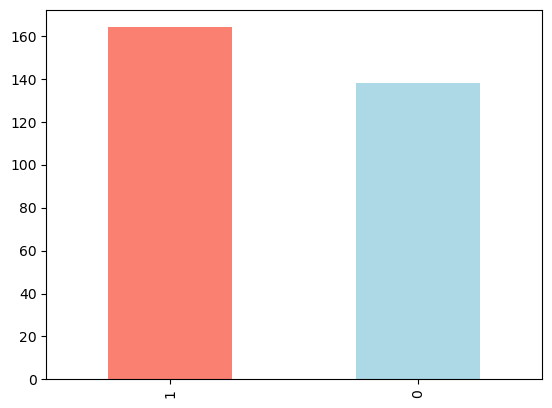

In [12]:
df["output"].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

In [16]:
pd.crosstab(df.output, df.sex)

sex,0,1
output,,
0,24,114
1,72,92


<Axes: xlabel='output'>

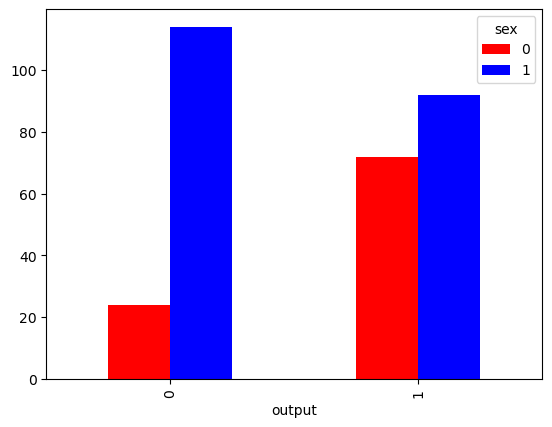

In [18]:
pd.crosstab(df.output, df.sex).plot(kind='bar', color=['red', 'blue'])

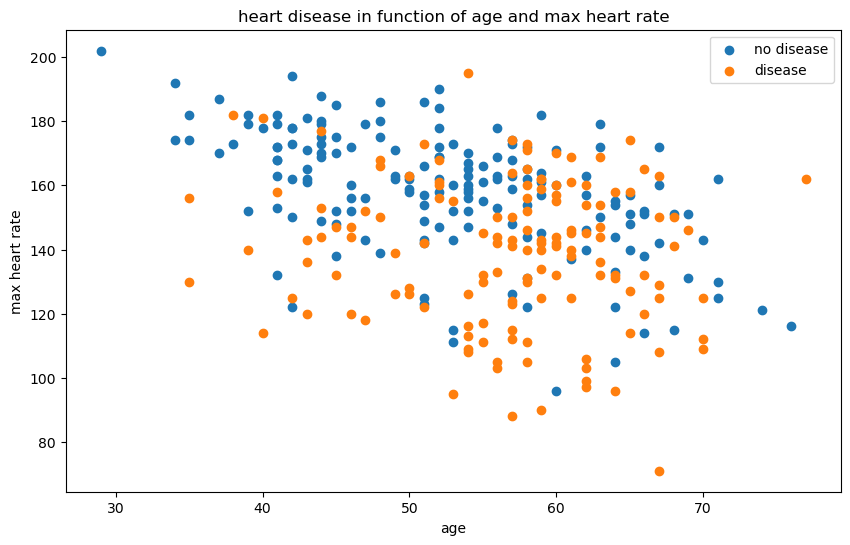

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.output==1],
           df.thalachh[df.output==1])

plt.scatter(df.age[df.output==0],
           df.thalachh[df.output==0])

plt.title('heart disease in function of age and max heart rate')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['no disease', 'disease']);

<Axes: ylabel='Frequency'>

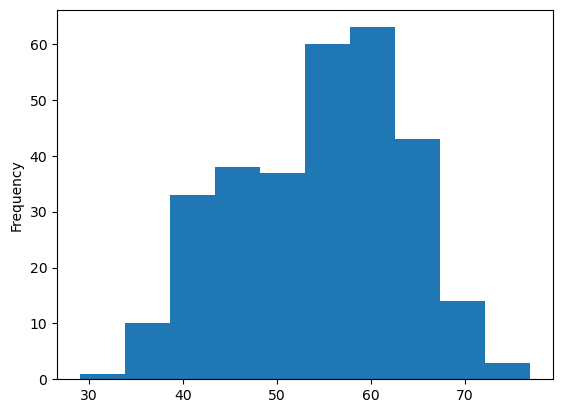

In [23]:
df.age.plot.hist()

In [25]:
pd.crosstab(df.cp, df.output)

output,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

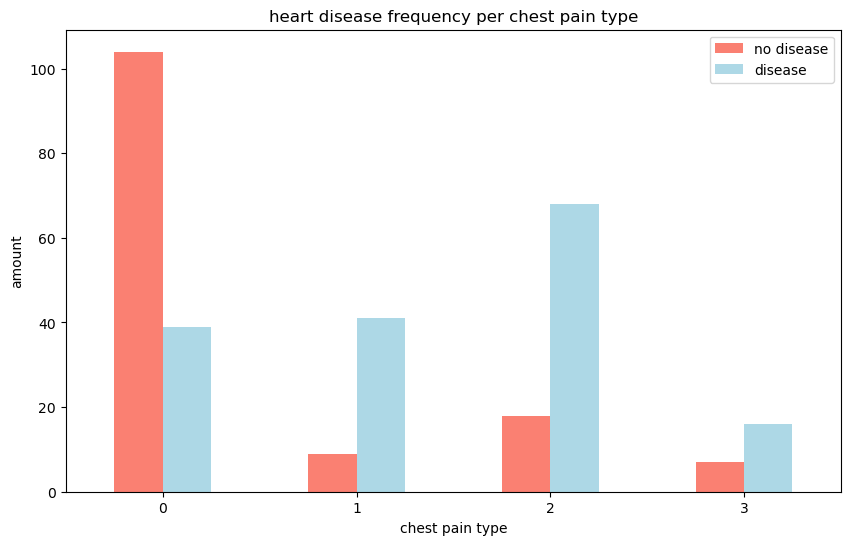

In [27]:
pd.crosstab(df.cp, df.output).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['no disease', 'disease'])
plt.xticks(rotation=0)

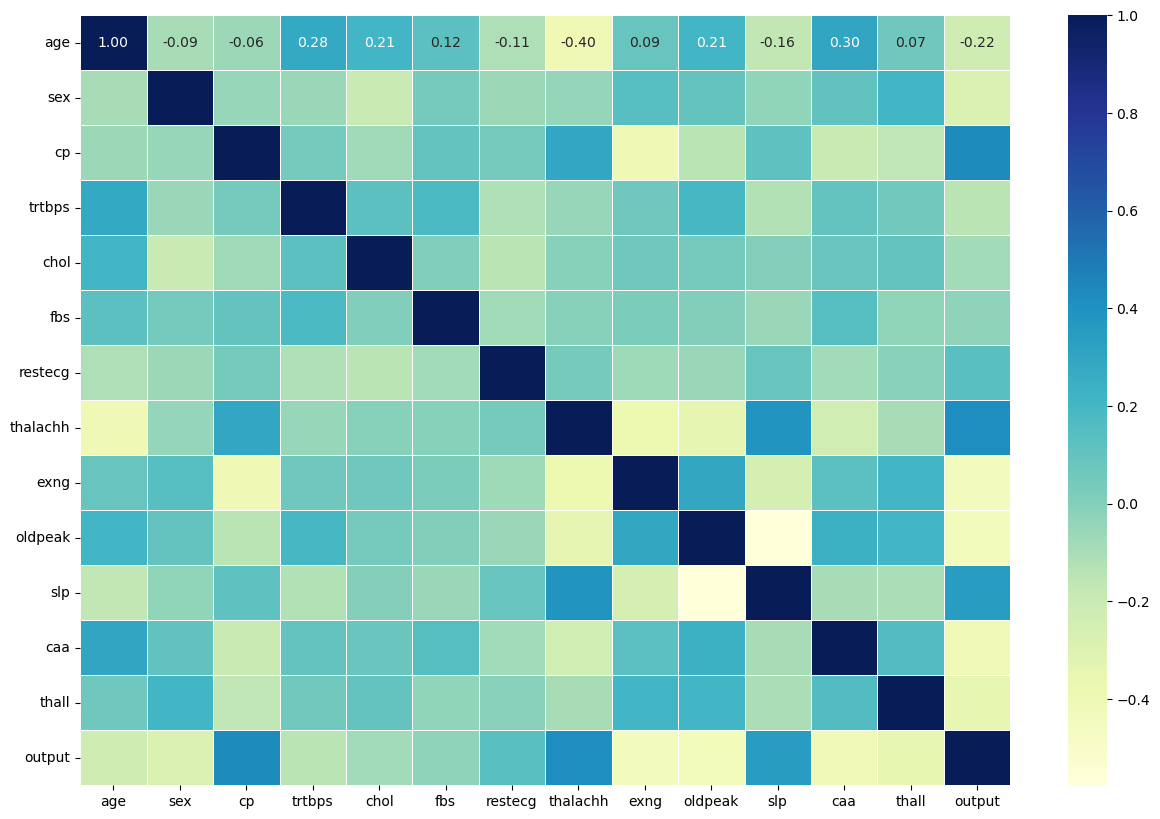

In [29]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu',)

<Figure size 1000x800 with 0 Axes>

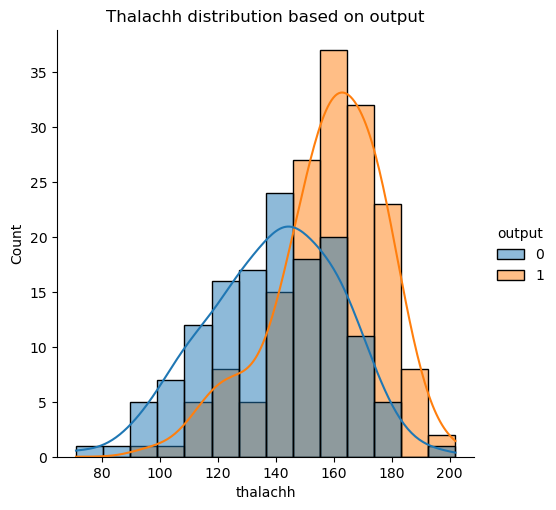

In [30]:
plt.figure(figsize=(10,8))
sns.displot(data = df, x = 'thalachh', kde = True, hue = 'output')
plt.title('Thalachh distribution based on output')
plt.show()


In [31]:
X=df.drop('output',axis=1)

In [32]:
y=df['output']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
model.coef_

array([[ 0.08239734, -0.67366976,  0.71446627, -0.3735154 , -0.16168866,
         0.28715269,  0.33424731,  0.55192326, -0.51517166, -0.3656667 ,
         0.61641027, -0.95905212, -0.7381849 ]])

In [41]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
prediction=model.predict(X_test)


In [46]:
accuracy_score(y_test,prediction)

0.8131868131868132

In [47]:
confusion_matrix(y_test,prediction)

array([[34,  8],
       [ 9, 40]], dtype=int64)

In [48]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

